2 goats, 74973 successes, 25027 failures, 74.97 probability of success
3 goats, 59304 successes, 40696 failures, 59.3 probability of success
4 goats, 48899 successes, 51101 failures, 48.9 probability of success
5 goats, 41416 successes, 58584 failures, 41.42 probability of success
6 goats, 36052 successes, 63948 failures, 36.05 probability of success
7 goats, 31532 successes, 68468 failures, 31.53 probability of success
8 goats, 28221 successes, 71779 failures, 28.22 probability of success
9 goats, 25899 successes, 74101 failures, 25.9 probability of success
10 goats, 23695 successes, 76305 failures, 23.7 probability of success


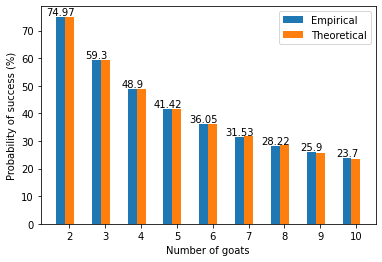

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from math import factorial

nums_of_goats = np.arange(2, 11)
empirical_probabilities = []
theoretical_probabilities = []

iterations = 100_000

# Calculate probabilities for multiple numbers of goats
for num_goats in nums_of_goats:
    successes = 0

    for _ in range(iterations):

        # Floor preferences are 0-indexed to easily mach the 'floors' array
        floor_preferences = [randint(0, num_goats - 1) for _ in range(num_goats)]

        floors = [0] * num_goats # Initialize all floors to empty

        for goat_preference in floor_preferences:
            current_floor = goat_preference

            while current_floor < num_goats and floors[current_floor] != 0:
                current_floor += 1
            
            if current_floor < num_goats:
                # This goat found an empty floor. Occupy it.
                floors[current_floor] = 1
            else:
                # This goat didn't find an empty floor; immediate failure, go to the next iteration.
                break

        if all(f == 1 for f in floors):
            successes += 1

    success_probability = round(successes / iterations * 100, 2)
    print(f"{num_goats} goats, {successes} successes, {iterations - successes} failures, {success_probability} probability of success")

    empirical_probabilities.append(success_probability)

    theoretical_successes = pow(num_goats + 1, num_goats - 1)
    all_possibilities = pow(num_goats, num_goats)

    theoretical_probabilities.append(round(theoretical_successes/all_possibilities * 100, 2))

bar_width=0.25
plt.figure()
bar_container = plt.bar(x=nums_of_goats, height=empirical_probabilities, width=bar_width, tick_label=nums_of_goats, )
bar_container_2 = plt.bar(x=nums_of_goats + bar_width, height=theoretical_probabilities, width=bar_width, tick_label=nums_of_goats)
plt.bar_label(container=bar_container, labels=empirical_probabilities)
#plt.bar_label(container=bar_container_2, labels=theoretical_probabilities)
plt.legend((bar_container, bar_container_2), ("Empirical", "Theoretical"))
plt.xlabel("Number of goats")
plt.ylabel("Probability of success (%)")
plt.show()